# Decoding Lottery Patterns

Author: Hyejin Ryoo

In [100]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

### Data Sources

Megaball: https://catalog.data.gov/dataset/lottery-mega-millions-winning-numbers-beginning-2002  
Powerball: https://catalog.data.gov/dataset/lottery-powerball-winning-numbers-beginning-2010             
Consumer Sentiment Index: https://fred.stlouisfed.org/series/UMCSENT 

In [81]:
# Megaball Dataset
data = pd.read_csv('c:/temp/Lottery.csv', parse_dates=['Draw Date'], index_col=["Draw Date"])
data

,Winning Numbers,Mega Ball,Multiplier
Draw Date,,,
2020-09-25,20 36 37 48 67,16,2.0
2020-09-29,14 39 43 44 67,19,3.0
2020-10-02,09 38 47 49 68,25,2.0
2020-10-06,15 16 18 39 59,17,3.0
2020-10-09,05 11 25 27 64,13,2.0
...,...,...,...
2023-09-01,10 31 42 43 55,8,2.0
2023-09-05,03 43 50 51 65,13,2.0
2023-09-08,03 12 17 51 62,1,3.0


In [9]:
#Calculating Null values
count_null = pd.DataFrame(data.isnull().sum(), columns = ['Null Values'])
count_null

,Null Values
Winning Numbers,0
Mega Ball,0
Multiplier,903


In [38]:
data['Split Numbers'] = data['Winning Numbers'].str.split()
number_counts = data['Split Numbers'].explode().value_counts()
most_common_number = number_counts.idxmax()
print(f"The most common winning number is: {most_common_number}")

The most common winning number is: 31


In [83]:
top_numbers_df = top_numbers.reset_index()
top_numbers_df.columns = ['Winning Number', 'Frequency']
print(top_numbers_df)

  Winning Number  Frequency
0             23        185
1             11        183
2             24        179
3             18        179
4             10        179
5             14        178
6             20        176
7             21        174
8             03        173
9             19        173


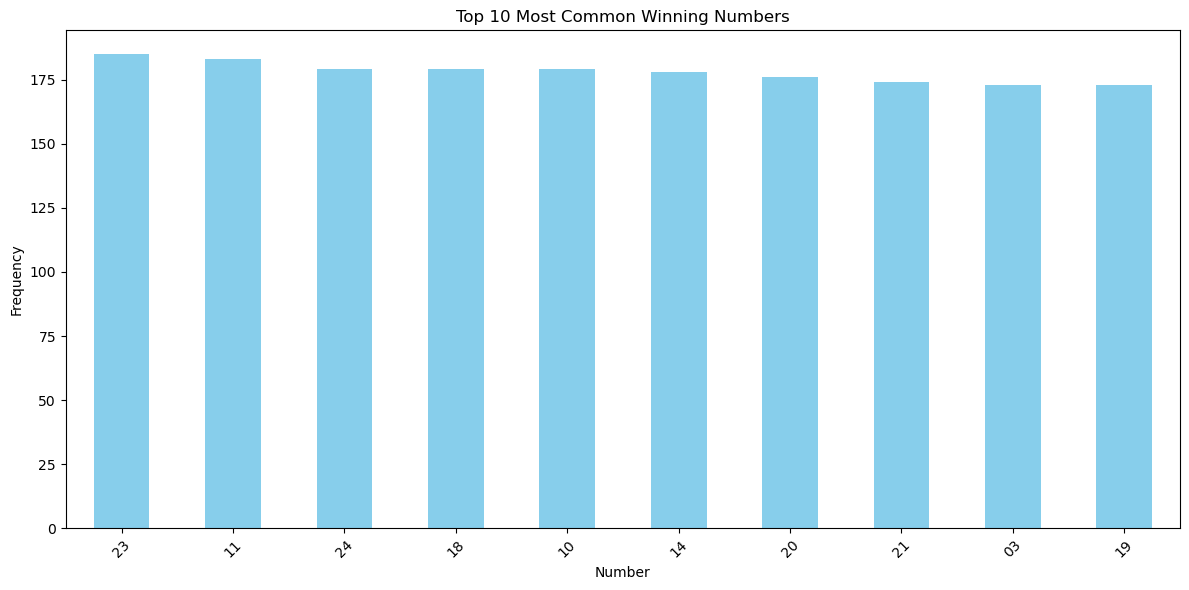

In [84]:
plt.figure(figsize=(12,6))
top_numbers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Winning Numbers")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
#Powerball Dataset
data2 = pd.read_csv('c:/temp/Lottery_Powerball.csv', parse_dates=['Draw Date'], index_col=["Draw Date"])
data2

,Winning Numbers,Multiplier
Draw Date,,
2020-09-26,11 21 27 36 62 24,3.0
2020-09-30,14 18 36 49 67 18,2.0
2020-10-03,18 31 36 43 47 20,2.0
2020-10-07,06 24 30 53 56 19,2.0
2020-10-10,05 18 23 40 50 18,3.0
...,...,...
2023-09-09,11 19 29 63 68 25,2.0
2023-09-11,09 25 27 53 66 05,2.0
2023-09-13,22 30 37 44 45 18,3.0


In [60]:
data2['Split Numbers'] = data2['Winning Numbers'].str.split()
number_counts = data2['Split Numbers'].explode().value_counts()
most_common_number = number_counts.idxmax()
print(f"The most common winning number is: {most_common_number}")

The most common winning number is: 23


In [96]:
monthly_counts = data.resample('M').size()
monthly_counts

average_draws = monthly_counts.mean()

min_draws_value = monthly_counts.min()
min_draws_month = monthly_counts.idxmin()

most_draws_month = monthly_counts.idxmax()
most_draws_value = monthly_counts.max()

std_draws = monthly_counts.std()

print(f"Average number of draws per month: {average_draws:.2f}")
print(f"Month with the fewest draws: {min_draws_month.strftime('%Y-%m')} ({min_draws_value} draws)")
print(f"Month with the most draws: {most_draws_month.strftime('%Y-%m')} ({most_draws_value} draws)")
print(f"Standard deviation of draws per month: {std_draws:.2f}")

Average number of draws per month: 8.65
Month with the fewest draws: 2002-05 (5 draws)
Month with the most draws: 2002-07 (9 draws)
Standard deviation of draws per month: 0.57


In [95]:
monthly_counts_2 = data2.resample('M').size()
monthly_counts_2

average_draws_2 = monthly_counts_2.mean()

min_draws_value_2 = monthly_counts_2.min()
min_draws_month_2 = monthly_counts_2.idxmin()

most_draws_month_2 = monthly_counts_2.idxmax()
most_draws_value_2 = monthly_counts_2.max()

std_draws_2 = monthly_counts_2.std()

print(f"Average number of draws per month: {average_draws_2:.2f}")
print(f"Month with the fewest draws: {min_draws_month_2.strftime('%Y-%m')} ({min_draws_value_2} draws)")
print(f"Month with the most draws: {most_draws_month_2.strftime('%Y-%m')} ({most_draws_value_2} draws)")
print(f"Standard deviation of draws per month: {std_draws_2:.2f}")

Average number of draws per month: 9.30
Month with the fewest draws: 2014-06 (7 draws)
Month with the most draws: 2022-01 (14 draws)
Standard deviation of draws per month: 1.60


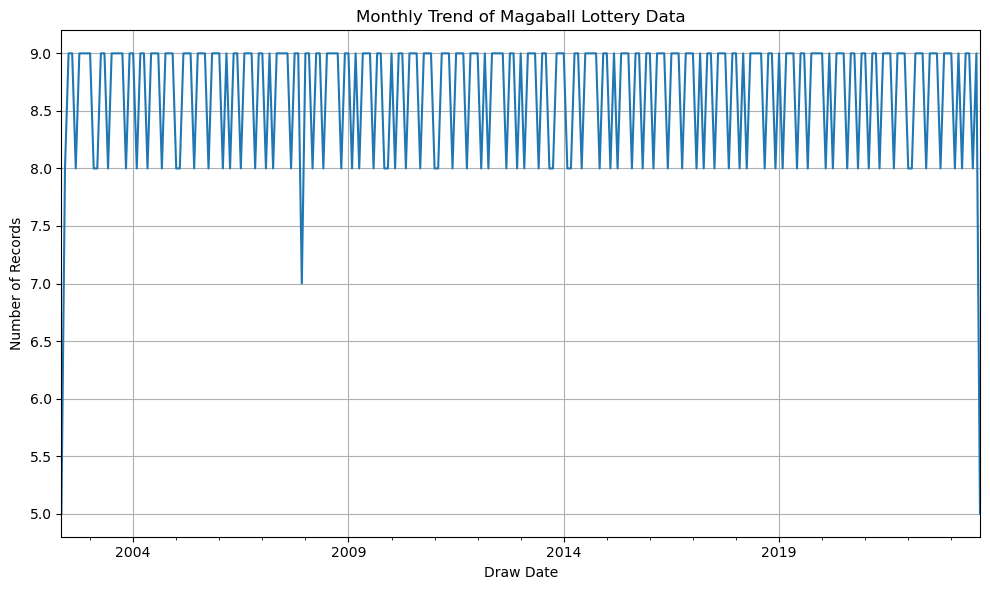

In [97]:
plt.figure(figsize=(10,6))
monthly_counts.plot()
plt.title('Monthly Trend of Magaball Lottery Data')
plt.xlabel('Draw Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.tight_layout()
plt.show()

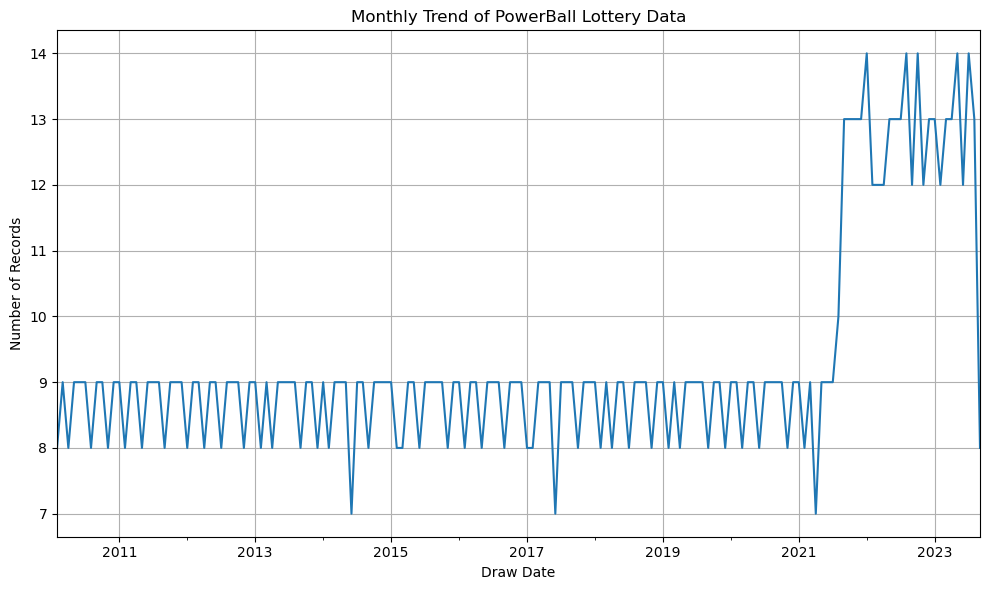

In [98]:
plt.figure(figsize=(10,6))
monthly_counts_2.plot()
plt.title('Monthly Trend of PowerBall Lottery Data')
plt.xlabel('Draw Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.tight_layout()
plt.show()

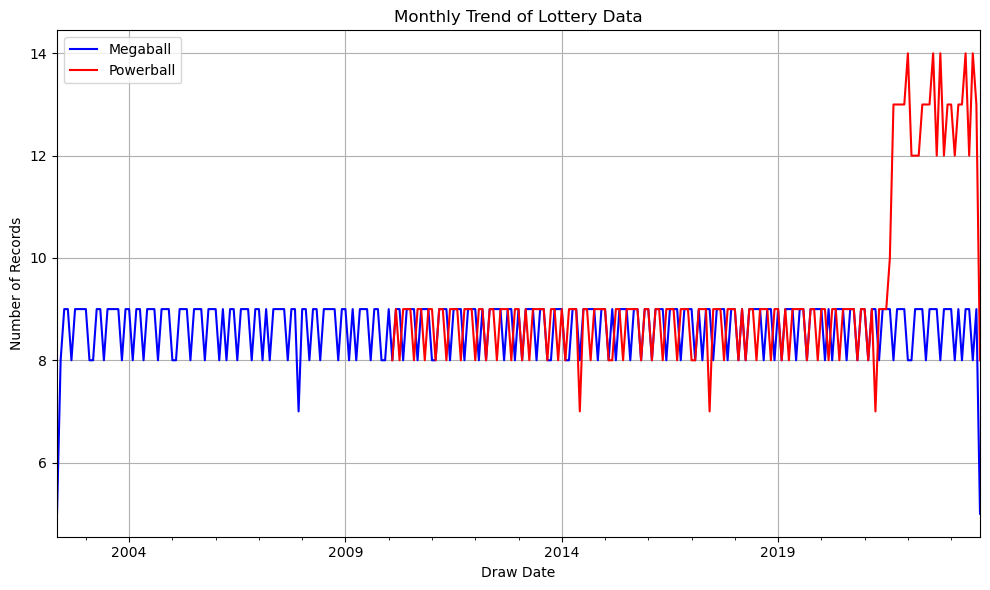

In [99]:
plt.figure(figsize=(10, 6))

# Magaball data
monthly_counts.plot(label='Megaball', color='blue')  

# Powerball data
monthly_counts_2.plot(label='Powerball', color='red')  


plt.title('Monthly Trend of Lottery Data')
plt.xlabel('Draw Date')
plt.ylabel('Number of Records')


plt.grid(True)
plt.tight_layout()


plt.legend()

plt.show()

### Comparison between Cosunme Sentiment Index and Powerball Data

In [127]:
data_c = pd.read_csv('c:/temp/consumer_sentiment.csv', parse_dates=['DATE'], index_col=["DATE"])
data_c

,UMCSENT
DATE,
1952-11-01,86.2
1952-12-01,.
1953-01-01,.
1953-02-01,90.7
1953-03-01,.
...,...
2023-03-01,62
2023-04-01,63.5
2023-05-01,59.2


In [128]:
data_c = data_c[data_c.index >= '2010-01-01']
data_c['UMCSENT'] = data_c['UMCSENT'].astype(float)
data_c

C:\Users\hyeji\AppData\Local\Temp\ipykernel_4824\241871823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c['UMCSENT'] = data_c['UMCSENT'].astype(float)


,UMCSENT
DATE,
2010-01-01,74.4
2010-02-01,73.6
2010-03-01,73.6
2010-04-01,72.2
2010-05-01,73.6
...,...
2023-03-01,62.0
2023-04-01,63.5
2023-05-01,59.2


Graph 1

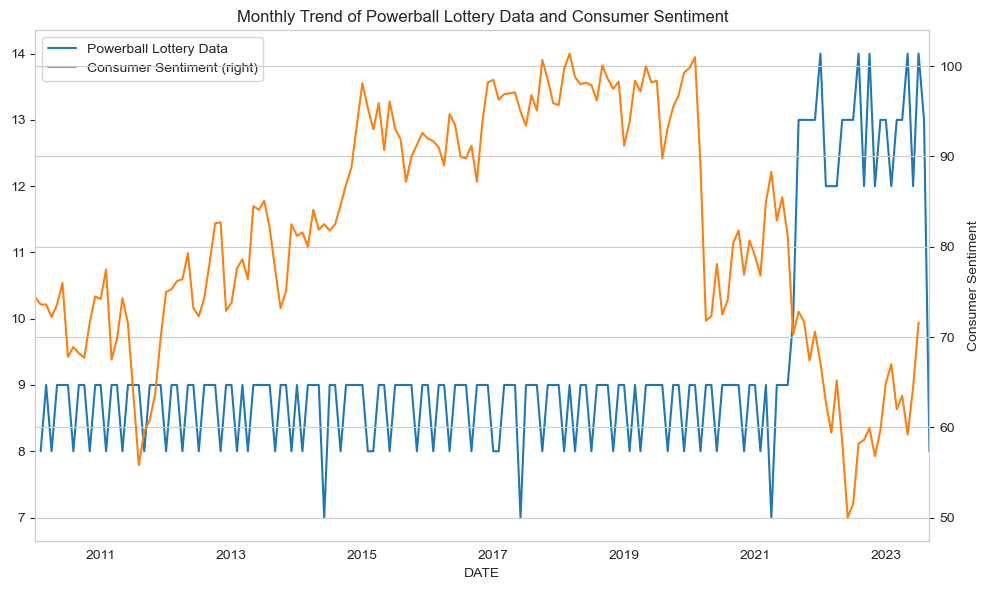

In [131]:
plt.figure(figsize=(10,6))
monthly_counts_2.plot(label='Powerball Lottery Data', legend=True)

ax = data_c['UMCSENT'].plot(ax=plt.gca(), secondary_y=True, label='Consumer Sentiment', legend=True)

plt.title('Monthly Trend of Powerball Lottery Data and Consumer Sentiment')
plt.xlabel('Draw Date')
plt.ylabel('Number of Records')
ax.set_ylabel('Consumer Sentiment')

plt.grid(True)
plt.tight_layout()

plt.show()

Graph 2

### Investigating patterns between the multiplier value and the frequency of specific winning numbers or Mega Ball results.

In [52]:
print(data['Multiplier'].describe())

count    1321.000000
mean        3.314913
std         1.003402
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Multiplier, dtype: float64


In [71]:
print(data2['Multiplier'].describe())

count    1315.000000
mean        2.814449
std         1.196369
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Multiplier, dtype: float64


In [53]:
median_multiplier = data['Multiplier'].median()

high_multiplier_data = data[data['Multiplier'] > median_multiplier]
low_multiplier_data = data[data['Multiplier'] <= median_multiplier]

high_multiplier_counts = high_multiplier_data['Split Numbers'].explode().value_counts()
low_multiplier_counts = low_multiplier_data['Split Numbers'].explode().value_counts()

high_megaball_counts = high_multiplier_data['Mega Ball'].value_counts()
low_megaball_counts = low_multiplier_data['Mega Ball'].value_counts()

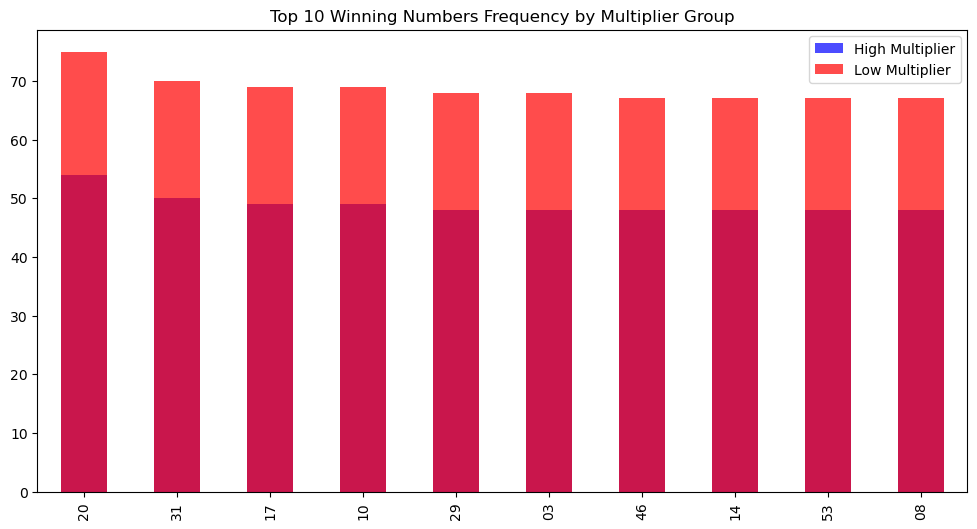

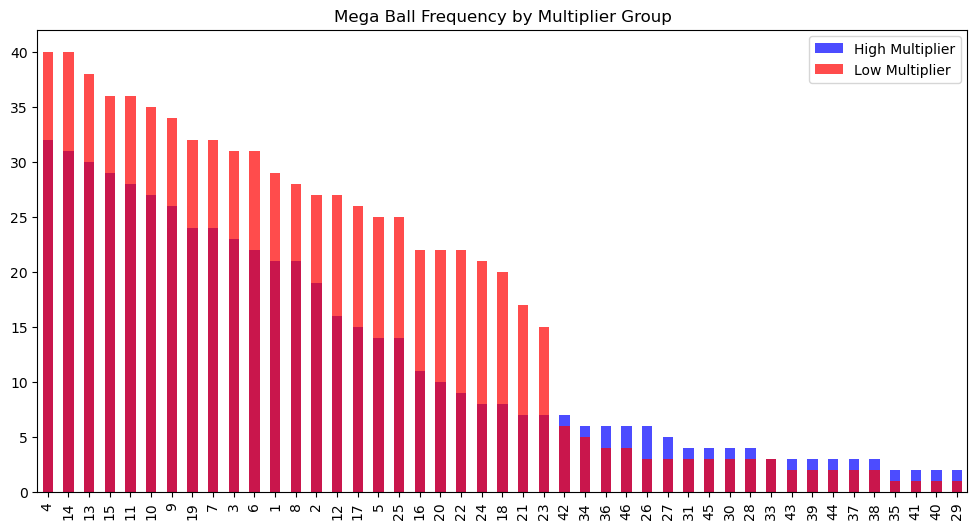

In [54]:
# Winning Numbers comparison
plt.figure(figsize=(12,6))
high_multiplier_counts.head(10).plot(kind='bar', alpha=0.7, label='High Multiplier', color='blue')
low_multiplier_counts.head(10).plot(kind='bar', alpha=0.7, label='Low Multiplier', color='red')
plt.legend()
plt.title("Top 10 Winning Numbers Frequency by Multiplier Group")
plt.show()

# Mega Ball comparison
plt.figure(figsize=(12,6))
high_megaball_counts.plot(kind='bar', alpha=0.7, label='High Multiplier', color='blue')
low_megaball_counts.plot(kind='bar', alpha=0.7, label='Low Multiplier', color='red')
plt.legend()
plt.title("Mega Ball Frequency by Multiplier Group")
plt.show()

In [74]:
median_multiplier_2 = data2['Multiplier'].median()

high_multiplier_data_2 = data2[data2['Multiplier'] > median_multiplier]
low_multiplier_data_2 = data2[data2['Multiplier'] <= median_multiplier]

high_multiplier_counts_2 = high_multiplier_data_2['Split Numbers'].explode().value_counts()
low_multiplier_counts_2 = low_multiplier_data_2['Split Numbers'].explode().value_counts()


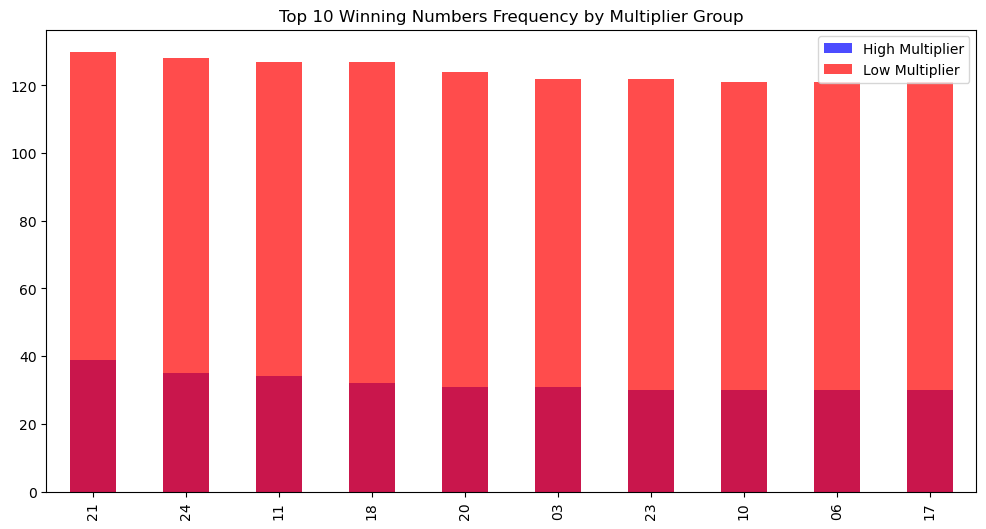

In [75]:
# Winning Numbers comparison
plt.figure(figsize=(12,6))
high_multiplier_counts_2.head(10).plot(kind='bar', alpha=0.7, label='High Multiplier', color='blue')
low_multiplier_counts_2.head(10).plot(kind='bar', alpha=0.7, label='Low Multiplier', color='red')
plt.legend()
plt.title("Top 10 Winning Numbers Frequency by Multiplier Group")
plt.show()

